**Credit Card Lead Prediction**  

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.  


The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc.   


In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.  

**Objective**  
**Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card.**  

**Importing all the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,f_oneway
from scipy import stats
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

**Loading the data for EDA(Exploratory Data Analysis)**

In [ ]:
bank_data=pd.read_csv("train_s3TEQDk.csv")
bank_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
bank_data.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [ ]:
print('Number of features are',bank_data.shape[1],sep=" ")
print('Number of Instances are',bank_data.shape[0],sep=" ")

Number of features are 11
Number of Instances are 245725


Lets look into each of the feature in detailed to gain information

In [ ]:
cols=list(bank_data.columns)
print(cols)

['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead']


**ID :** It is a unique Identification code that identifies each individual. It has no significance in prediction. It can be used as an index for data Exploration.

In [ ]:
len(bank_data['ID'].unique())

245725

ID feature has 245725 Unique values, which is equal to number of instances in the data. We can transform this feature into index of the data.

In [ ]:
bank_data.set_index('ID',inplace=True)
bank_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


As seen above ID is converted into Index and can be used to identify each instance individually.

**Gender :** It is a feature that identifies each individual as Male or Feale according to there appeearence.

In [ ]:
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

There are two unique categories in Gender Feature,**Female and Male.**  So, **Gender** is considered as categorical feature with 2 categories.

**Age :** It describes the age of each individual. From this feature we can say the birth year of individual. Further we can categorize it into Children(Age 0-14 years), Youth(Age 15-24 years), Adults(Age 25-64 Years) and seniors(Age 65 years and over).

In [ ]:
bank_data['Age'].dtype

dtype('int64')

Age is a continous Feature as it can be anything fron 0-150. It can be converted to categorical feature if it is categorized into Children(Age 0-14 years), Youth(Age 15-24 years), Adults(Age 25-64 Years) and seniors(Age 65 years and over).

**Region_Code :** It is a code that identifes from which region the customer is.

In [ ]:
print(list(bank_data['Region_Code'].unique()))
print()
print(len(bank_data['Region_Code'].unique()))

['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283', 'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284', 'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256', 'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264', 'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271']

35


There are 35 unique Region_Codes in the data. It is a Categorical features as each of them can be categorized based of the reqion they live in.

**Occupation :** It tells that wheter an individual has a job, or have own bussiness oan other things hhow do they get money for living.

In [ ]:
bank_data['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

Occupation of an idividual can be of many things, but they are categorized into 4 groups. Salaried individual who work for certain salary. Self-Employed individuals are the people who earn money on their own by doing cab driver,farmer,etc. they donot work under a company. Entrepreneurs are thr one who setups a business taking on finalcial risks in the hope of profit. others include people like non-employed, students, how wifes, etc...

**Channel_Code :** It refers to the channek that site visits come through to get to your site.(How visits are acquired). There are different Acquaistion channels such as organic(refers to visits that come from someone going to your site from organic search results), Direct(When someone gets to your site by typing site address), Referral(When some other person recomments the site), Paidsearch(when someone gets to your site by clicking in oaid search), Email(When someone gets to site from link in an email), Social(posted on socail media), Display(Ads), other(someone gets to site via a campaign that include certain tracking features).

In [ ]:
bank_data['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

There are 4 channels through which people came to the bank.

**Vintage :** It is the age of an item as it relates to the year it was created. It is number of months it has been sicnce an individuak created their bank account.

In [ ]:
bank_data['Vintage'].dtype

dtype('int64')

As it is a count of number of months it has been since account is created. It is a continuous Feature.

**Credit_Product :** It tells that If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

In [ ]:
bank_data['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

It has three categories Yes, No, nan(represents Missing values). Each individual is categorised into two(Yes/No). So, it is categorical Feature.

**Avg_Account_Balance :** It tells the Average Account Balance for the Customer in last 12 Months.

In [ ]:
bank_data['Avg_Account_Balance'].dtype

dtype('int64')

At it is an average of amount it is a continuous Feature.

**Is_Active :** It tells that "If the Customer is Active in last 3 Months".

In [ ]:
bank_data['Is_Active'].unique()

array(['No', 'Yes'], dtype=object)

It has two categories Yes, No. So it is a categorical Feature.

**Is_Lead :** It tells 'If the Customer is interested for the Credit Card or not'
- 0 : Customer is not interested
- 1 : Customer is interested

In [ ]:
bank_data['Is_Lead'].unique()

array([0, 1])

It conatins o's and 1's. **0 : Customer is not interested. 1 : Customer is interested**


Lets divide the features into Categorical and Continuous based on the data and feature discription. We need not condsider ID as it is coverted to index that identifies each individual and Is_Lead as it is  the output that should be predicted based on the other features.

In [ ]:
act_categ_cols=['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
act_conti_cols=['Age', 'Vintage', 'Avg_Account_Balance']

Let's se the data types of the Features. And compare it to categorcal and continuous Features. Continuous Features will have 'int64' or 'float64' as their dtype and categorical features have objects as their dtype. Lets sepearate them based on actual data given. Some categorical Features may have numerical as categories but pandas recogize them as numerical. So we have conver columns like this to actual form.

In [ ]:
bank_data.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [ ]:
categ_cols=[]
conti_cols=[]
for col in bank_data.columns:
    if bank_data[col].dtype=='int64' or bank_data[col].dtype=='float64':
        conti_cols.append(col)
    elif bank_data[col].dtype=='object':
        categ_cols.append(col)
print("Categorial Features are :",categ_cols,sep=' ')
print()
print("Continuous Features are :",conti_cols,sep=' ')

Categorial Features are : ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

Continuous Features are : ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']


In [ ]:
conti_cols.remove('Is_Lead')
print("Categorial Features are :",categ_cols,sep=' ')
print()
print("Continuous Features are :",conti_cols,sep=' ')

Categorial Features are : ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

Continuous Features are : ['Age', 'Vintage', 'Avg_Account_Balance']


As you can see Is_Lead is actually a categorical Frature but it contains 0's and 1's it is considered as continuous column.As it is the feature that we have to predict from the data we will not do the transormation from continuous to categorical Feature.  
**All the features are converted to their respective data types as of the decription of the feature.**

**Now lets do some Exploratory Data Analysis on the data**  

**Descriptive stats and infoemation about Categorical and continuous columns**

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245725 entries, NNVBBKZB to BOCZSWLJ
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 20.6+ MB


In [ ]:
missing_count=[]
for col in bank_data.columns:
    missing_count.append(bank_data[col].isnull().sum())
    print(' The feature',col,"has",bank_data[col].isnull().sum(),"Null values",sep=" ")

 The feature Gender has 0 Null values
 The feature Age has 0 Null values
 The feature Region_Code has 0 Null values
 The feature Occupation has 0 Null values
 The feature Channel_Code has 0 Null values
 The feature Vintage has 0 Null values
 The feature Credit_Product has 29325 Null values
 The feature Avg_Account_Balance has 0 Null values
 The feature Is_Active has 0 Null values
 The feature Is_Lead has 0 Null values


In [ ]:
missing_percentage=[]
for col in bank_data.columns:
    missing_percentage.append(bank_data[col].isnull().sum()*100/bank_data.shape[0])
    print(' The feature',col,"has",bank_data[col].isnull().sum()*100/bank_data.shape[0],"percrntage of Null values",sep=" ")

 The feature Gender has 0.0 percrntage of Null values
 The feature Age has 0.0 percrntage of Null values
 The feature Region_Code has 0.0 percrntage of Null values
 The feature Occupation has 0.0 percrntage of Null values
 The feature Channel_Code has 0.0 percrntage of Null values
 The feature Vintage has 0.0 percrntage of Null values
 The feature Credit_Product has 11.9340726421813 percrntage of Null values
 The feature Avg_Account_Balance has 0.0 percrntage of Null values
 The feature Is_Active has 0.0 percrntage of Null values
 The feature Is_Lead has 0.0 percrntage of Null values


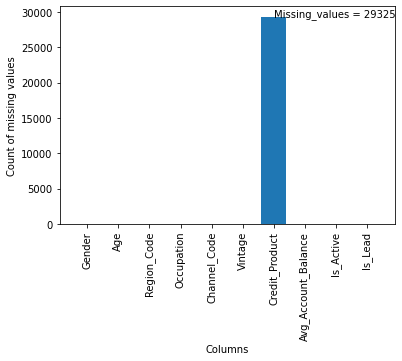

In [ ]:
plt.bar(bank_data.columns,missing_count)
plt.xlabel("Columns")
plt.ylabel("Count of missing values")
plt.xticks(rotation=90)
plt.annotate('Missing_values = 29325',xy=('Credit_Product',29325))
plt.show()

In [ ]:
len(missing_percentage)

10

In [ ]:
len(bank_data.columns)

10

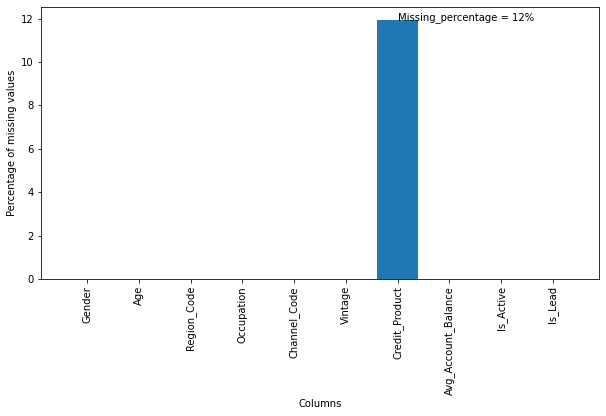

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(bank_data.columns,missing_percentage)
plt.xlabel("Columns")
plt.ylabel("Percentage of missing values")
plt.xticks(rotation=90)
plt.annotate('Missing_percentage = 12%',xy=('Credit_Product',11.9340726421813))
plt.show()

From the observations Credict_product is the only feature contaning null values. Out of 245725, 29325 are null values. 11.94(12 approx) percentage of the Credict_Product feature has missing values.As it is a less percent of missing values we can go with missing value treatment which is done later of the parts.

**Descriptive Stats**  

**Continous Features**

In [ ]:
bank_data[conti_cols].describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


From the abservations the average age of an individual is 43 and the minimum age of an individual is 23 and maximum is 85.The standard deviation is 14.828672.  

The average account balance is 11.8403 Lakhs and the minimun and maximun account balance are 0.2079 lakhs and 103.5201 Lakhs. The standard deviation is 852936.4.  

The avergae vintage is 47 months and the minimum and maximum are 7 and 135 months rescpetively. The standard deviation is 32.353136.  

| Statatics | Age  | Vintage  | Avg_Account_Balance | 
|-----------|------|----------| --------------------|
|   Mean    |  43  |    47    |      1128403        |
|   Median  |  43  |    32    |      13666666       |
|   STD     | 14.8 |  32.353  |         85236.4     |
|   Min     |  23  |     7    |         20790       |
|   Max     |  85  |   135    |      10352010       |
| Null count|  0   |     0    |             0       |


**Descriptive stats of continous columns**

In [ ]:
bank_data[categ_cols].describe(include='object')

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,216400,245725
unique,2,35,4,4,2,2
top,Male,RG268,Self_Employed,X1,No,No
freq,134197,35934,100886,103718,144357,150290


From the observations,  
- Gender has 2 categories and the most occuring category is Male with 135297 frequency.  
- Region_Code has 35 categories and the most occuring category is RG268 with 35934 frequency.  
- Occupation has 4 categories and the most occuring category is Self_Employed with 100886 frequency.  
- Channel_Code has 4 categories and the most occuring category is X1 with 103718 frequency.  
- Credit_Product has 2 categories and the most occuring category is No with 144357 frequency.  
- Is_Active has 2 categories and the most occuring category is No with 150290 frequency.  

| Statatics | Gender | Region_Code |  Occupation  | Channel_Code | Credit_Product | Is_Active |
|-----------|--------|-------------|--------------|--------------|----------------|-----------|
|  Unique   |   2    |     35      |      4       |      4       |        2       |     2     |
|   Mode    |  Male  |    RG268    | Self_Employed|     X1       |        No      |     No    |
| Frequency | 134197 |    35934    |    100886    |    103718    |      144357    |   150290  |


**Descriptive Stats for Output Feature(IS_Lead)**

In [ ]:
bank_data['Is_Lead'].astype(object).describe(include='object')

count     245725
unique         2
top            0
freq      187437
Name: Is_Lead, dtype: int64

From the observation  
- Is_Lead has 2 categories and the most occuring category is 0 with 187437 frequency
| Statatics | IS_Lead| 
|-----------|--------|
|  Unique   |   2    |
|   Mode    |   0    |
| Frequency | 187437 |

**Univariate Analysis of Features** 

**Continuous Features**  

**Ouliers analysis**

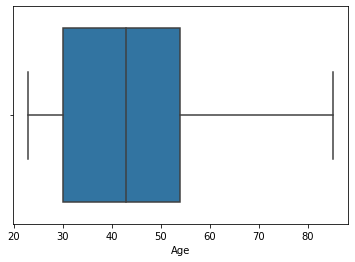

In [ ]:
sns.boxplot(x=bank_data['Age'])

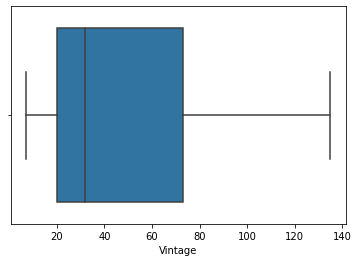

In [ ]:
sns.boxplot(x=bank_data['Vintage'])

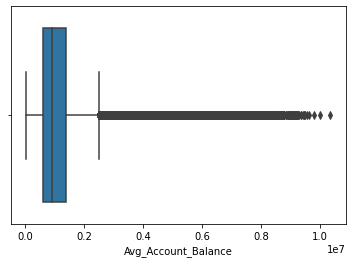

In [ ]:
sns.boxplot(x=bank_data['Avg_Account_Balance'])

From tje observations  
- There are no outliers in Age and Vintage. There are so many outliers in Avg_Account_Balance

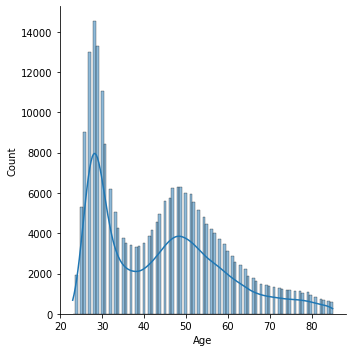

In [ ]:
sns.displot(bank_data['Age'],bins=100,kde=True)

((array([-4.53939294, -4.34870864, -4.24526711, ...,  4.24526711,
          4.34870864,  4.53939294]), array([23, 24, 24, ..., 85, 85, 85])),
 (14.300178462391147, 43.85630684708516, 0.9643435434810436))

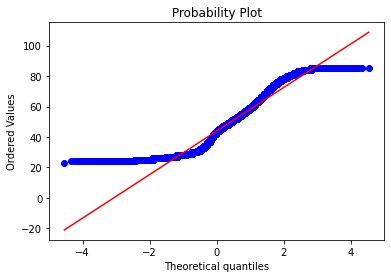

In [ ]:
stats.probplot(bank_data['Age'], dist="norm", plot=plt)

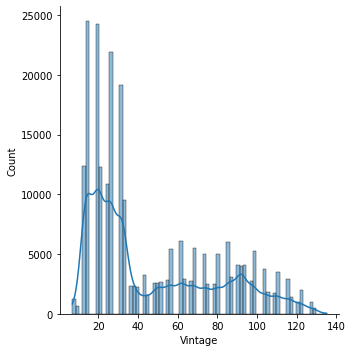

In [ ]:
sns.displot(bank_data['Vintage'],kde=True)

((array([-4.53939294, -4.34870864, -4.24526711, ...,  4.24526711,
          4.34870864,  4.53939294]),
  array([  7,   7,   7, ..., 135, 135, 135])),
 (30.15749672237347, 46.95914131651236, 0.932119262461722))

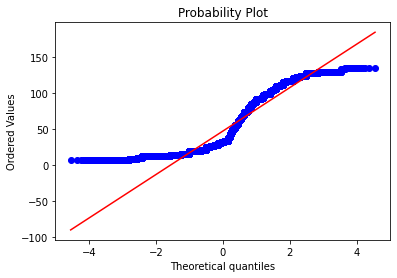

In [ ]:
stats.probplot(bank_data['Vintage'], dist="norm", plot=plt)

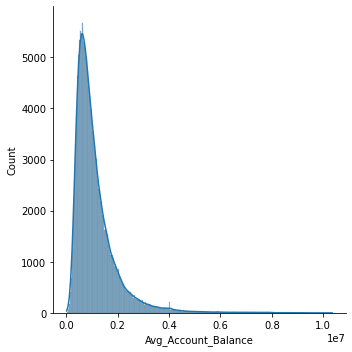

In [ ]:
sns.displot(bank_data['Avg_Account_Balance'],kde=True)

((array([-4.53939294, -4.34870864, -4.24526711, ...,  4.24526711,
          4.34870864,  4.53939294]),
  array([   20790,    45657,    45950, ...,  9792796, 10007678, 10352009])),
 (737620.9259145876, 1128403.1010194323, 0.8647870459691805))

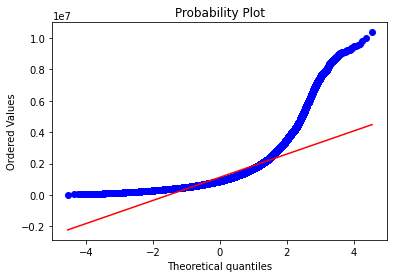

In [ ]:
stats.probplot(bank_data['Avg_Account_Balance'], dist="norm", plot=plt)

From the above observations  
- No Continous Feature is Normally distributed
- Age and Vintage features doesnot seems like any famous distributions but Avg_Account_Balance distribution seems like log normal distribution

**Categorical Features**

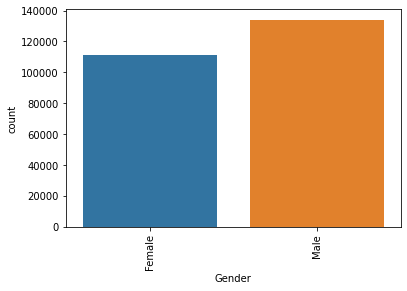

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=bank_data,x='Gender')

Observation  
- Male are higher in amount than females

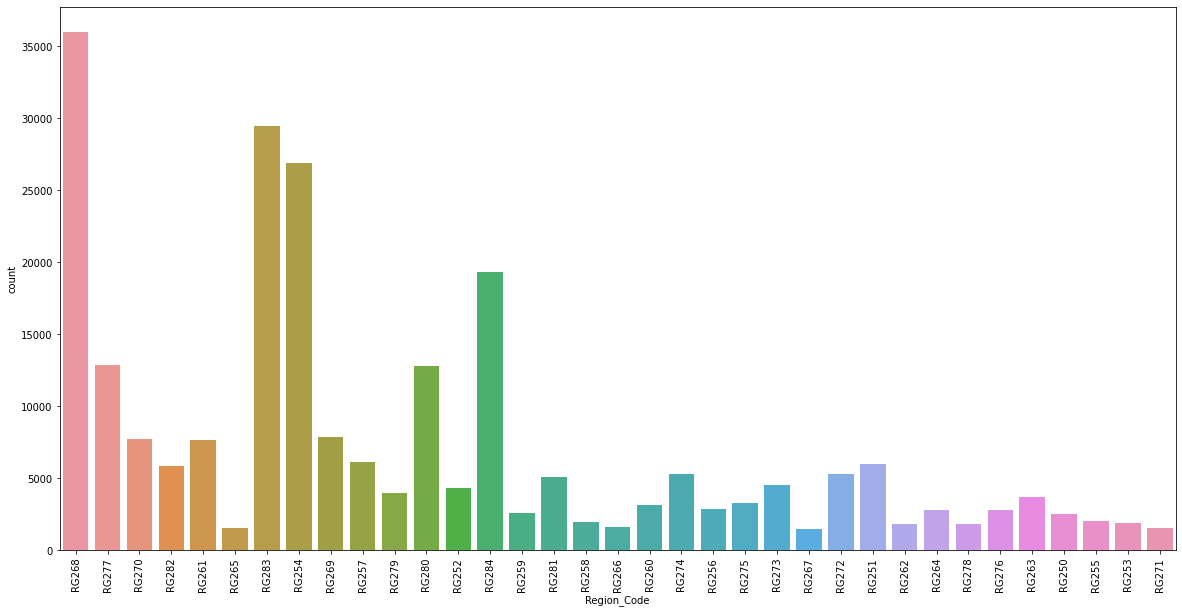

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data=bank_data,x='Region_Code')

observation  
- Most of the people are from Region 'RG268'

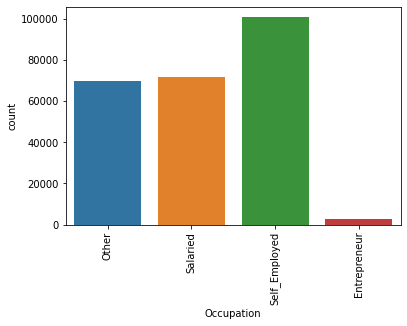

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=bank_data,x='Occupation')

observation  
- Most of the people are 'Self_Employed'

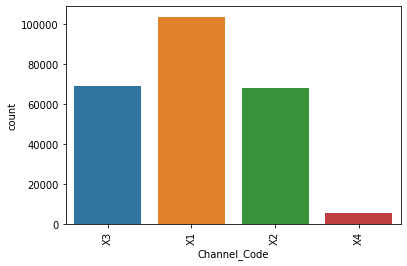

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=bank_data,x='Channel_Code')

observation  
- Most of the people by channel_code 'X1'

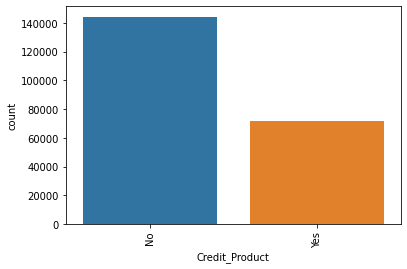

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=bank_data,x='Credit_Product')

observation  
- Most of the people doenot have credit_products

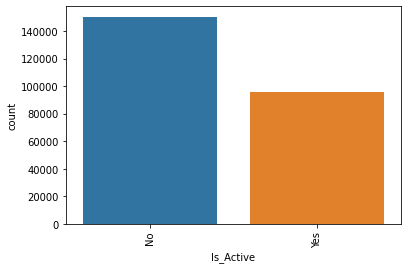

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=bank_data,x='Is_Active')

observation  
- Most of the people are inavtive from last 3 months

**Bivariate Analysis**

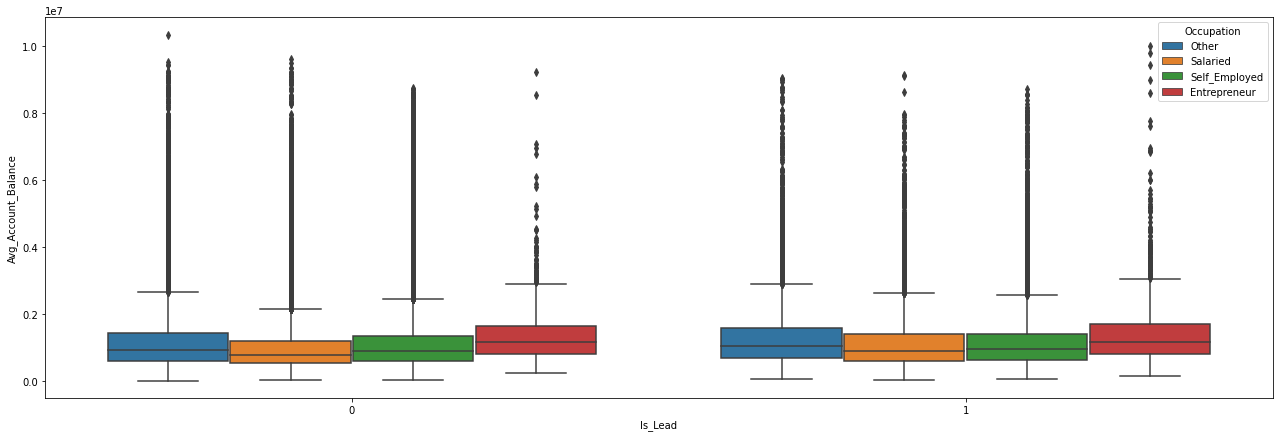

In [ ]:
plt.figure(figsize=(22,7))
sns.boxplot(y=bank_data['Avg_Account_Balance'],x=bank_data['Is_Lead'].astype(object),hue=bank_data['Occupation'])

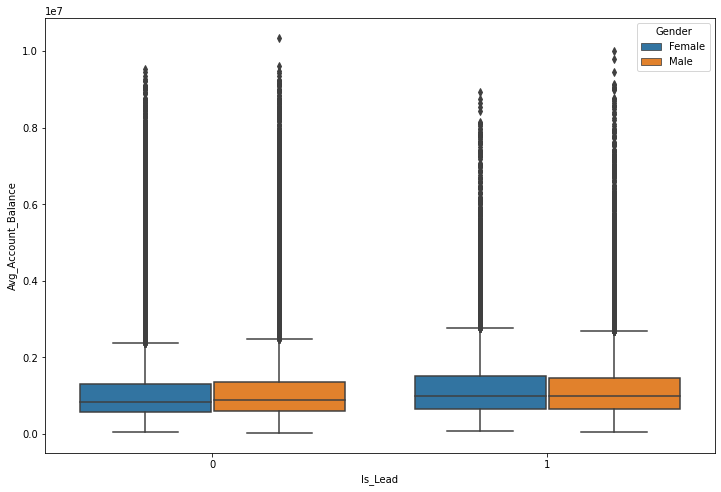

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y=bank_data['Avg_Account_Balance'],x=bank_data['Is_Lead'].astype(object),hue=bank_data['Gender'])

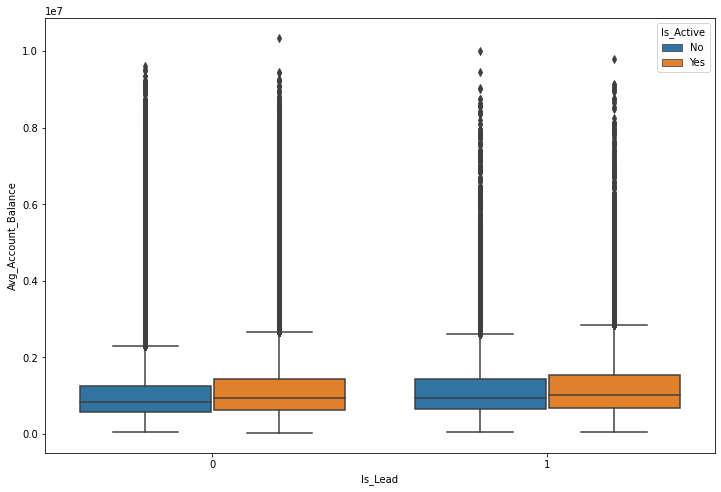

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y=bank_data['Avg_Account_Balance'],x=bank_data['Is_Lead'].astype(object),hue=bank_data['Is_Active'])

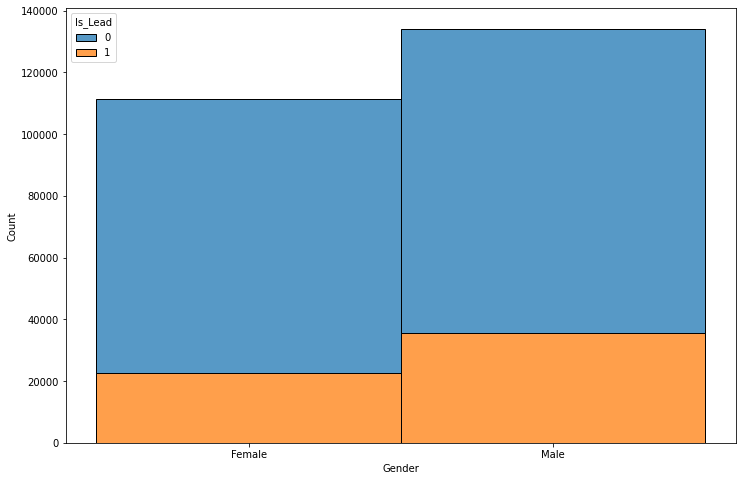

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=bank_data,x='Gender',hue='Is_Lead',stat="count", multiple="stack")

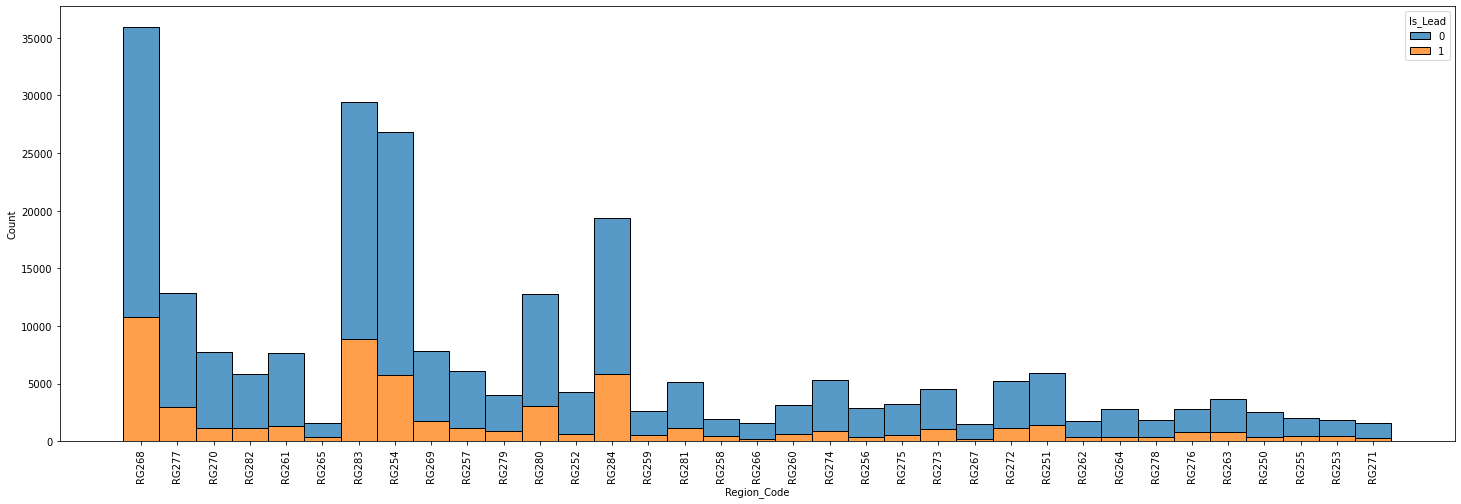

In [ ]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sns.histplot(data=bank_data,x='Region_Code',hue='Is_Lead',stat="count", multiple="stack")

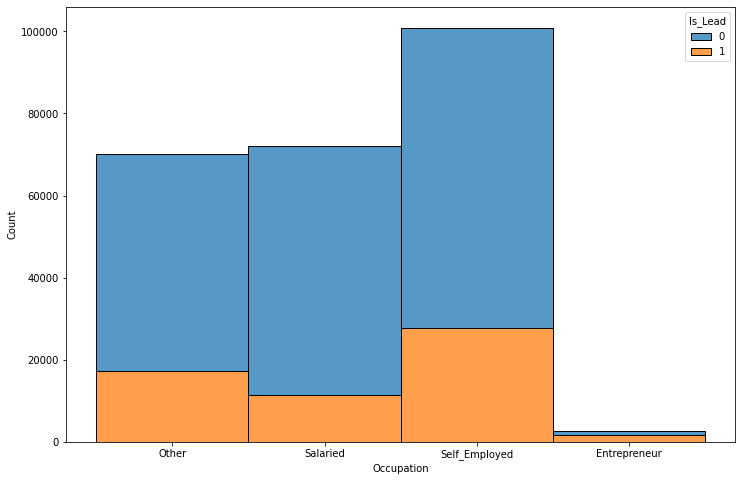

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=bank_data,x='Occupation',hue='Is_Lead',stat="count", multiple="stack")

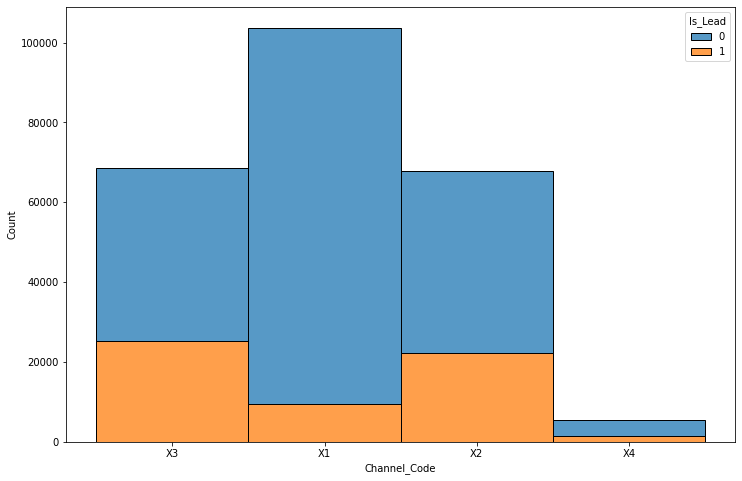

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=bank_data,x='Channel_Code',hue='Is_Lead',stat="count", multiple="stack")

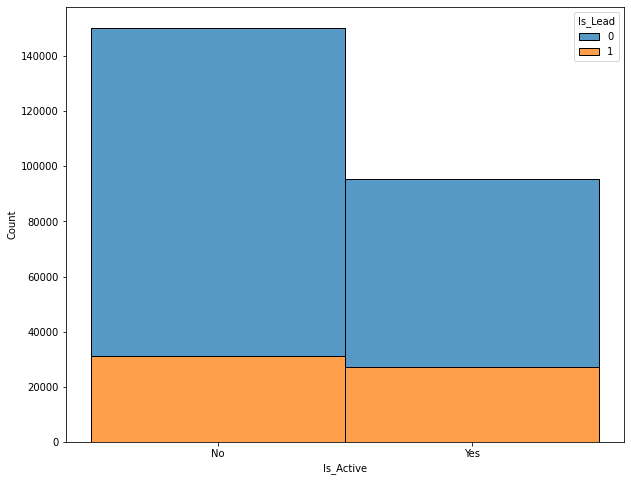

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=bank_data,x='Is_Active',hue='Is_Lead',stat="count", multiple="stack")

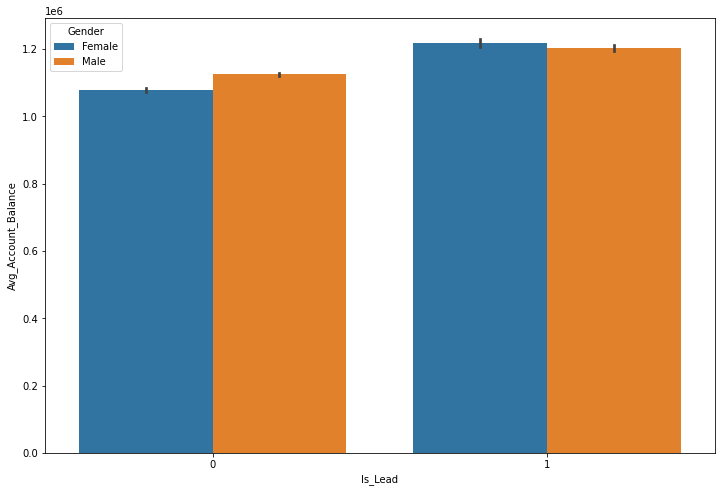

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=bank_data['Is_Lead'].astype(object),y=bank_data['Avg_Account_Balance'],hue=bank_data['Gender'])

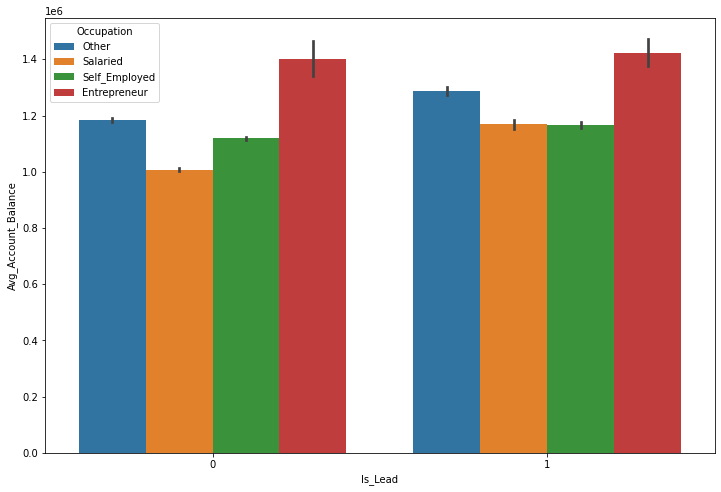

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=bank_data['Is_Lead'].astype(object),y=bank_data['Avg_Account_Balance'],hue=bank_data['Occupation'])

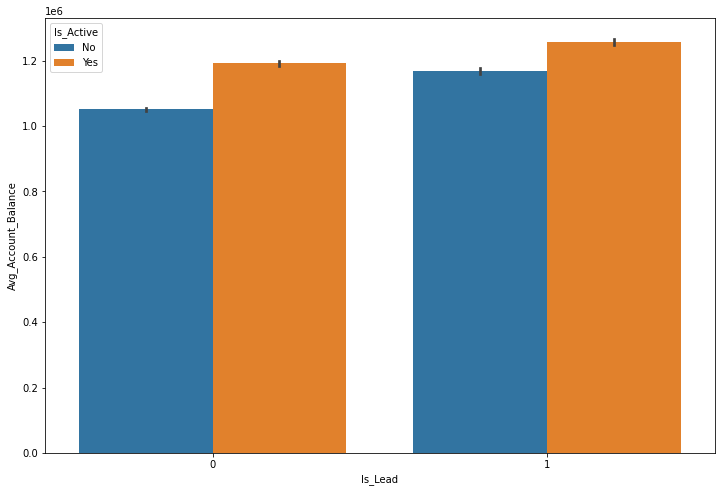

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=bank_data['Is_Lead'].astype(object),y=bank_data['Avg_Account_Balance'],hue=bank_data['Is_Active'])

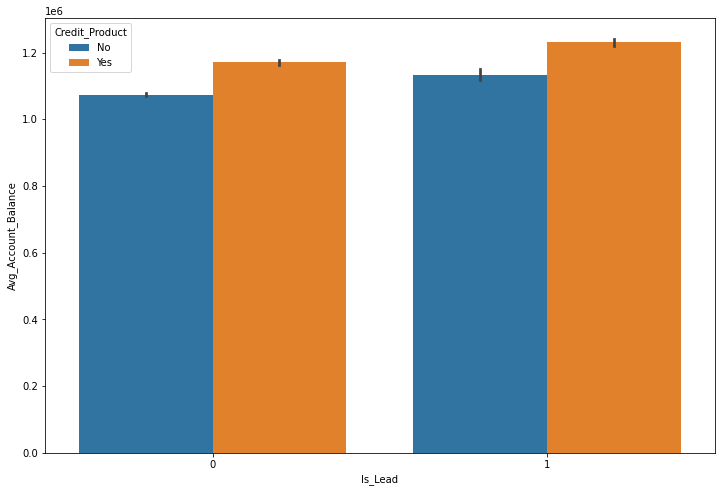

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=bank_data['Is_Lead'].astype(object),y=bank_data['Avg_Account_Balance'],hue=bank_data['Credit_Product'])

**Correlation between Features and Is_Lead feature**  
**Is there a relationship between Features and specialisation?**    

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \ Categorical\ Feature\ and\ Is\_Lead\ are\ correlated $$
Null Hypothesis (Status Quo): $$ H_0: \ Categorical Feature\ and\ Is\_Lead\ are\ not\ correlated $$

Step - 2:
Compute observed and expected values

Step - 3:
Compute Test Statistic: $$ \chi^2 = \sum\left(\frac{O_i-E_i}{E_i}\right)$$

Step - 4:
Decide $ \alpha $

Step - 5: Compute p-value
$$ if (p \ value < 0.05) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [ ]:
for col in categ_cols:
    cont=pd.crosstab(bank_data[col],bank_data['Is_Lead'])
    if chi2_contingency(cont)[1]<0.05:
        print(col,"and","Is_Lead","are correlated",sep=" ")
    else:
        print(col,"and","Is_Lead","are not correlated",sep=" ")

Gender and Is_Lead are correlated
Region_Code and Is_Lead are correlated
Occupation and Is_Lead are correlated
Channel_Code and Is_Lead are correlated
Credit_Product and Is_Lead are correlated
Is_Active and Is_Lead are correlated


Observations  
- Gender, Region_Code, Occupation, Channel_Code, Credit_Product, Is_Active are correlated with Is_Lead(Predicted Feature)

In [ ]:
non_corr=[]
for col in conti_cols:
    lis=pd.DataFrame(bank_data.groupby('Is_Lead'))
    li=[]
    for j in range(len(lis)):
        li.append(list(lis[1][j][col]))
    if f_oneway(*li)[1]>0.05:
        print(col,"and","Is_Lead","are not correlated",sep=" ") 
    else:
        print(col,"and","Is_Lead","are correlated",sep=" ")

Age and Is_Lead are correlated
Vintage and Is_Lead are correlated
Avg_Account_Balance and Is_Lead are correlated


In [ ]:
pd.DataFrame(bank_data.groupby('Is_Lead'))[1][0]['Avg_Account_Balance']

ID
NNVBBKZB    1045696
IDD62UNG     581988
HD3DSEMC    1484315
BF3NC7KV     470454
TEASRWXV     886787
             ...   
BPAWWXZN    1925586
HFNB7JY8     862952
GEHAUCWT     670659
GE7V8SAH     407504
BOCZSWLJ    1129276
Name: Avg_Account_Balance, Length: 187437, dtype: int64

observation  
- Age, Vintage, Avg_Account_Balance features are correlated with Is_Lead feature.

Observation  
- All the features are correlated with Is_Lead Feature.
- Missing values are present in Credit_Product Feature only
- Outliers are present in Avg_Account_Balance  

outliers and missing value treatments should be done as the data have missing values and outliers.

**Outlier's Treatment**  
**Scaling of the Features with outliers**

In [ ]:
bank_data_standard=bank_data.copy(deep=True)
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
bank_data_standard['Avg_Account_Balance']=standard.fit_transform(np.array(bank_data_standard['Avg_Account_Balance']).reshape(-1,1))

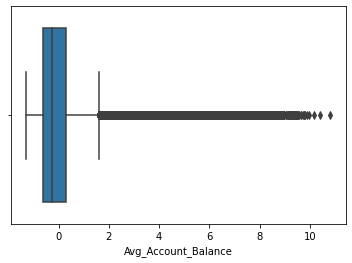

In [ ]:
sns.boxplot(bank_data_standard['Avg_Account_Balance'])

In [ ]:
bank_data_minmax=bank_data.copy(deep=True)
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
bank_data_minmax['Avg_Account_Balance']=minmax.fit_transform(np.array(bank_data_minmax['Avg_Account_Balance']).reshape(-1,1))

In [ ]:
def removeoutliers(col):
    sorted(col)
    quat1,quant2=col.quantile([.25,0.75])
    IQR=quant2-quat1
    lowerRange=quat1-1.5*IQR
    upperRange=quant2+1.5*IQR
    return lowerRange,upperRange
lowerRange,upperRange=removeoutliers(bank_data_minmax['Avg_Account_Balance'])
sum(bank_data_minmax['Avg_Account_Balance']>upperRange)

14612

In [ ]:
def removeoutliers(col):
    sorted(col)
    quat1,quant2=col.quantile([.25,0.75])
    IQR=quant2-quat1
    lowerRange=quat1-1.5*IQR
    upperRange=quant2+1.5*IQR
    return lowerRange,upperRange
lowerRange,upperRange=removeoutliers(bank_data['Avg_Account_Balance'])
sum(bank_data['Avg_Account_Balance']>upperRange)

14612

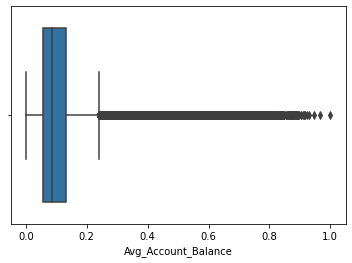

In [ ]:
sns.boxplot(bank_data_minmax['Avg_Account_Balance'])

observation  
- Scaling didnot remove the outliers from the data

**Using Log Tranformation**

In [ ]:
bank_data_log=bank_data.copy(deep=True)
bank_data_log['Avg_Account_Balance']=np.log(bank_data_log['Avg_Account_Balance'])

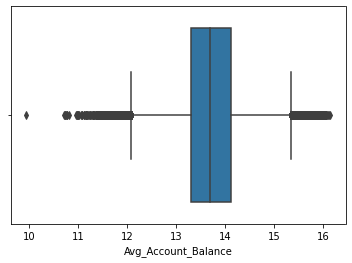

In [ ]:
sns.boxplot(bank_data_log['Avg_Account_Balance'])

Observation  
- using log transormation also didnot treat outliers

**Using BOX-COX Transformation**

In [ ]:
bank_data_box=bank_data.copy(deep=True)
bank_data_box['Avg_Account_Balance'],lamda=stats.boxcox(bank_data_box['Avg_Account_Balance'])

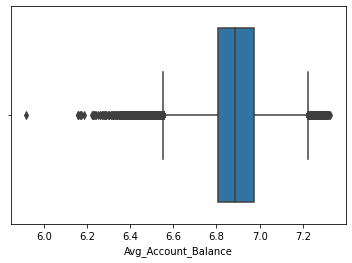

In [ ]:
sns.boxplot(bank_data_box['Avg_Account_Balance'])

observation  
- Box-Cox Transformation also didnot treat outliers.

As any of the above methods didnot treat outliers Impuations are used  
**75%le + IQR Imputaion**

In [ ]:
def removeoutliers(col):
    sorted(col)
    quat1,quant2=col.quantile([.25,0.75])
    IQR=quant2-quat1
    lowerRange=quat1-1.5*IQR
    upperRange=quant2+1.5*IQR
    return lowerRange,upperRange
bank_data_imput=bank_data.copy(deep=True)
lowerRange,upperRange=removeoutliers(bank_data_imput['Avg_Account_Balance'])
bank_data_imput[bank_data_imput['Avg_Account_Balance']>upperRange]['Avg_Account_Balance']=upperRange

In [ ]:
bank_data_imput['Avg_Account_Balance']

ID
NNVBBKZB    1045696
IDD62UNG     581988
HD3DSEMC    1484315
BF3NC7KV     470454
TEASRWXV     886787
             ...   
BPAWWXZN    1925586
HFNB7JY8     862952
GEHAUCWT     670659
GE7V8SAH     407504
BOCZSWLJ    1129276
Name: Avg_Account_Balance, Length: 245725, dtype: int64

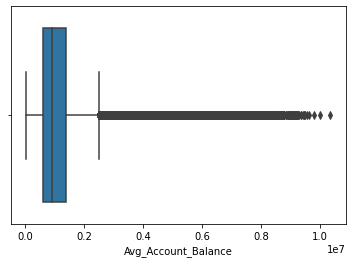

In [ ]:
sns.boxplot(bank_data_imput['Avg_Account_Balance'])

**Median Imputaution for outlier treatment**

In [ ]:
def removeoutliers(col):
    sorted(col)
    quat1,quant2=col.quantile([.25,0.75])
    IQR=quant2-quat1
    lowerRange=quat1-1.5*IQR
    upperRange=quant2+1.5*IQR
    return lowerRange,upperRange
bank_data_imp=bank_data.copy(deep=True)
lowerRange,upperRange=removeoutliers(bank_data_imp['Avg_Account_Balance'])

In [ ]:
bank_data_imp[bank_data_imp['Avg_Account_Balance']>upperRange]['Avg_Account_Balance']=bank_data_imp['Avg_Account_Balance'].median()

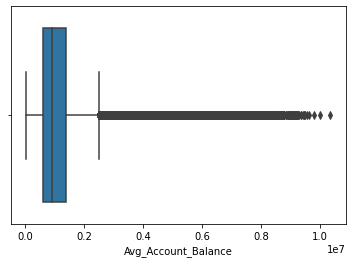

In [ ]:
sns.boxplot(bank_data_imp['Avg_Account_Balance'])

observation  
- Not able to remove the outliers 

**Missing value treatment**

In [ ]:
bank_data['Credit_Product'].fillna('Yes',inplace=True)

In [ ]:
bank_data['Credit_Product'].isnull().sum()

0

obesrvation  
- As the 'Credit_product' is categorical feature we imputed mode in place of missing values.

**Data Preperation**  
- Scaling Continous Features
- Creating Dummies for Categorical columns

In [ ]:
bank_data['Avg_Account_Balance']=np.log(bank_data['Avg_Account_Balance'])

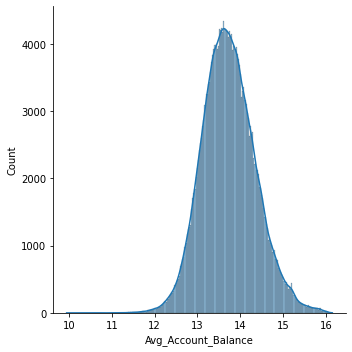

In [ ]:
sns.displot(bank_data['Avg_Account_Balance'],kde=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in categ_cols:
  bank_data[col]=label.fit_transform(bank_data[col])

In [ ]:
bank_data[categ_cols].dtypes

Gender            int64
Region_Code       int64
Occupation        int64
Channel_Code      int64
Credit_Product    int64
Is_Active         int64
dtype: object

**Train-Test split**

In [ ]:
output=bank_data['Is_Lead']
bank_data.drop('Is_Lead',inplace=True,axis=1)

In [ ]:
bank_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
NNVBBKZB,0,73,18,1,2,43,0,13.860193,0
IDD62UNG,0,30,27,2,0,32,0,13.274205,0
HD3DSEMC,0,56,18,3,2,26,0,14.210464,1
BF3NC7KV,1,34,20,2,0,19,0,13.061453,0
TEASRWXV,0,30,32,2,0,33,0,13.695360,0


**Model Building**  

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_validation(x,y,model,params,k_folds=5):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
        print(f"Fold: {fold}")
        x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = x.iloc[test_idx], y.iloc[test_idx]
        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [ ]:
def cross_validation_GB(x,y,model,params,k_folds=5):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
        print(f"Fold: {fold}")
        x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = x.iloc[test_idx], y.iloc[test_idx]
        alg = model(**params)
        alg.fit(x_train, y_train)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [ ]:
def cross_validation_RF(x,y,model,params,k_folds=5):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
        print(f"Fold: {fold}")
        x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = x.iloc[test_idx], y.iloc[test_idx]
        alg = model(**params)
        alg.fit(x_train, y_train)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

**Random_Forest**  
For Feature Selction


In [ ]:
rf_params={
    'n_estimators':20000,
    'criterion':'gini',
    'max_depth':6,
    'max_features':'sqrt',
    'n_jobs':-1,
    'warm_start':True,
    'max_samples':0.1
}

In [ ]:
from sklearn.feature_selection import SelectFromModel
SFM= SelectFromModel(estimator=RF,threshold=0.006)
SFM.fit(bank_data,output)
SFM.get_support()

array([False,  True, False,  True,  True,  True,  True,  True,  True])

**XG_Boost**

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from xgboost import XGBClassifier

In [ ]:
xgb_params= {'n_estimators': 40000, 
             'max_depth': 6,'learning_rate': 0.02,'booster': 'gbtree',
         'objective': 'binary:logistic',}

In [ ]:
from xgboost import XGBClassifier
XG=cross_validation(bank_data.iloc[:,[False,  True, True,  True,  True,  True,  True,  True,  True]],output,XGBClassifier,params=xgb_params)

Fold: 0
[0]	validation_0-error:0.181483
Will train until validation_0-error hasn't improved in 100 rounds.
[400]	validation_0-error:0.174178
Stopping. Best iteration:
[329]	validation_0-error:0.173792

roc_auc_score: 0.8510026082156019
--------------------------------------------------
Fold: 1
[0]	validation_0-error:0.184291
Will train until validation_0-error hasn't improved in 100 rounds.
[400]	validation_0-error:0.176417
Stopping. Best iteration:
[345]	validation_0-error:0.176132

roc_auc_score: 0.8485376622741119
--------------------------------------------------
Fold: 2
[0]	validation_0-error:0.180853
Will train until validation_0-error hasn't improved in 100 rounds.
[400]	validation_0-error:0.173609
Stopping. Best iteration:
[303]	validation_0-error:0.173202

roc_auc_score: 0.8516549201344222
--------------------------------------------------
Fold: 3
[0]	validation_0-error:0.180547
Will train until validation_0-error hasn't improved in 100 rounds.
Stopping. Best iteration:
[207]	

**Gradient_Boost**

In [ ]:
gb_params={'learning_rate':0.02, 'n_estimators':40000,'subsample':0.7, 'max_depth':6,'loss':'exponential','max_features':'log2','n_iter_no_change':100,
           'warm_start':True}

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
GB=cross_validation_GB(bank_data.iloc[:,[False,  True, True,  True,  True,  True,  True,  True,  True]],output,GradientBoostingClassifier,params=gb_params)

Fold: 0
roc_auc_score: 0.8503836414521767
--------------------------------------------------
Fold: 1
roc_auc_score: 0.8483312481045663
--------------------------------------------------
Fold: 2
roc_auc_score: 0.8514328771276038
--------------------------------------------------
Fold: 3
roc_auc_score: 0.8518699589403722
--------------------------------------------------
Fold: 4
roc_auc_score: 0.8498091370136696
--------------------------------------------------


In [ ]:
**LGBM_Boosting**

In [98]:
lgb_params= {'learning_rate': 0.02, 
             'n_estimators': 40000              
}

In [99]:
from lightgbm import LGBMClassifier
LGBM=cross_validation(bank_data.iloc[:,[False,  True, True,  True,  True,  True,  True,  True,  True]],output,LGBMClassifier,lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds.
[400]	valid_0's binary_logloss: 0.381347
Early stopping, best iteration is:
[575]	valid_0's binary_logloss: 0.381307
roc_auc_score: 0.8512890983368661
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds.
[400]	valid_0's binary_logloss: 0.383043
Early stopping, best iteration is:
[569]	valid_0's binary_logloss: 0.382935
roc_auc_score: 0.8488115161708343
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds.
[400]	valid_0's binary_logloss: 0.382012
Early stopping, best iteration is:
[511]	valid_0's binary_logloss: 0.381874
roc_auc_score: 0.851821360861266
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds.
[400]	valid_0's binary_logloss: 0.381233
Early stopping, best iteration is:
[684]	valid_0's binary_logloss: 0.3

**CAT_Boosting**

In [104]:
cat_params={'learning_rate': 0.02, 
             'n_estimators': 40000,
            'max_depth':14
}

In [102]:
!pip install catboost

     |████████████████████████████████| 67.3MB 55kB/s 


In [105]:
from catboost import CatBoostClassifier
CAT = cross_validation(bank_data.iloc[:,[False,  True, True,  True,  True,  True,  True,  True,  True]],output,CatBoostClassifier, cat_params)

Fold: 0
0:	learn: 0.6785897	test: 0.6785617	best: 0.6785617 (0)	total: 139ms	remaining: 1h 32m 33s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3829527622
bestIteration = 196

Shrink model to first 197 iterations.
roc_auc_score: 0.8500746409106269
--------------------------------------------------
Fold: 1
0:	learn: 0.6785251	test: 0.6784476	best: 0.6784476 (0)	total: 68.9ms	remaining: 45m 56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.384212067
bestIteration = 198

Shrink model to first 199 iterations.
roc_auc_score: 0.8480659400210548
--------------------------------------------------
Fold: 2
0:	learn: 0.6785770	test: 0.6786481	best: 0.6786481 (0)	total: 70.9ms	remaining: 47m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3836928326
bestIteration = 211

Shrink model to first 212 iterations.
roc_auc_score: 0.8499653242860566
--------------------------------------------------
Fold: 3
0:	learn: 0.6785752	test: 0.

**Test Data**

In [106]:
test_data=pd.read_csv('test_mSzZ8RL.csv')
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [107]:
test_data.set_index('ID',inplace=True)
test_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [108]:
for col in test_data.columns:
    if sum(test_data[col].isnull())>0:
        print(col,"has missing values")

Credit_Product has missing values


In [109]:
test_data['Avg_Account_Balance'],lamda=stats.boxcox(test_data['Avg_Account_Balance'])

In [110]:
test_data['Credit_Product'].fillna('Yes',inplace=True)

In [111]:
for col in categ_cols:
  test_data[col]=label.fit_transform(test_data[col])

In [115]:
xg_pred=XG.predict_proba(test_data.iloc[:,[False,  True, True,  True,  True,  True,  True,  True,  True]])[:,1]
lgbm_predict=LGBM.predict_proba(test_data.iloc[:,[False,  True, True,  True,  True,  True,  True,  True,  True]])[:,1]
cat_predict=CAT.predict_proba(test_data.iloc[:,[False,  True, True,  True,  True,  True,  True,  True,  True]])[:,1]
test_data["Is_Lead"]=(xg_pred+lgbm_predict+cat_predict)/3

In [116]:
test_data["Is_Lead"]

ID
VBENBARO    0.068734
CCMEWNKY    0.367420
VK3KGA9M    0.054325
TT8RPZVC    0.023763
SHQZEYTZ    0.030828
              ...   
DBENJOYI    0.961994
CWQ72DWS    0.691109
HDESC8GU    0.097443
2PW4SFCA    0.234090
F2NOYPPZ    0.055151
Name: Is_Lead, Length: 105312, dtype: float64

In [119]:
Predicted=pd.DataFrame(test_data['Is_Lead'])

**Conveting to csv file**  
Final Submission Prditions

In [118]:
Predicted.to_csv('XG+lgbm+cat_predict.csv')